In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
from scipy.stats import norm

In [ ]:
#Escolhendo ativos da bolsa e valor investido
carteira = {'VALE3.SA': 250,'SBSP3.SA':200,'NVDC34.SA':100,'ITUB4.SA':150,'PETR4.SA':350}
 #{'PETR4.SA': 150,'ITUB4.SA':150,'SBSP3.SA':250,'NVDC34.SA':250}

In [ ]:
carteira.keys()

dict_keys(['VALE3.SA', 'SBSP3.SA', 'NVDC34.SA', 'ITUB4.SA', 'PETR4.SA'])

In [ ]:
carteira.values()

dict_values([250, 200, 100, 150, 350])

In [ ]:
acoes = list(carteira.keys())
acoes

['VALE3.SA', 'SBSP3.SA', 'NVDC34.SA', 'ITUB4.SA', 'PETR4.SA']

In [ ]:
hoje = datetime.today().strftime('%Y-%m-%d')
print(hoje)

2024-07-10


In [ ]:
inicio = '2023-07-01'
fim = hoje

In [ ]:
precos_finais = yf.download(acoes,inicio,fim)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [ ]:
carteira_df = pd.Series(data=carteira,index=list(carteira.keys()))
carteira_df

VALE3.SA     250
SBSP3.SA     200
NVDC34.SA    100
ITUB4.SA     150
PETR4.SA     350
dtype: int64

In [ ]:
#Quantas ações da pra comprar com o valor investido
primeiro_dia = precos_finais.iloc[0]
qtd = round(carteira_df/primeiro_dia)
qtd

ITUB4.SA      6.0
NVDC34.SA    23.0
PETR4.SA     14.0
SBSP3.SA      4.0
VALE3.SA      4.0
dtype: float64

In [ ]:
#preço unitario por açao no primeiro dia da carteira
primeiro_dia

Ticker
ITUB4.SA     26.954342
NVDC34.SA     4.269102
PETR4.SA     25.261478
SBSP3.SA     55.406300
VALE3.SA     60.932819
Name: 2023-07-03 00:00:00, dtype: float64

In [ ]:
pl = precos_finais*qtd

In [ ]:
#Valor total da carteira
pl['TOTAL'] = pl.sum(axis=1)
pl['TOTAL'].iloc[0]

1078.9325733184814

In [ ]:
pl.iloc[0]

Ticker
ITUB4.SA      161.726051
NVDC34.SA      98.189348
PETR4.SA      353.660698
SBSP3.SA      221.625198
VALE3.SA      243.731277
TOTAL        1078.932573
Name: 2023-07-03 00:00:00, dtype: float64

In [ ]:
#Carteira Inicial
pl

Ticker,ITUB4.SA,NVDC34.SA,PETR4.SA,SBSP3.SA,VALE3.SA,TOTAL
Date,,,,,,
2023-07-03,161.726051,98.189348,353.660698,221.625198,243.731277,1078.932573
2023-07-04,160.720860,97.453500,354.483707,218.284515,242.516830,1073.459413
2023-07-05,162.116993,98.143363,354.013390,220.092407,240.382401,1074.748553
2023-07-06,159.715679,99.661044,348.604988,216.319397,238.652756,1062.953864
2023-07-07,162.731289,98.879210,346.841396,220.092407,240.897598,1069.441901
...,...,...,...,...,...,...
2024-07-03,197.160004,339.710011,529.760002,322.600006,256.720001,1645.950024
2024-07-04,197.459999,338.330001,522.479996,326.799988,255.440002,1640.509986
2024-07-05,197.580002,329.130010,525.280006,328.320007,254.399994,1634.710019


In [ ]:
print(f'Rendimento da carteira: {round(((pl["TOTAL"].iloc[-1]/pl["TOTAL"].iloc[0])-1)*100,2)}%')

Rendimento da carteira: 54.49%


In [ ]:
ibov = yf.download('^BVSP',inicio,fim)['Adj Close']
ibov = pd.DataFrame(ibov)
ibov = ibov.rename(columns={'Adj Close': 'IBOV'})
ibov

[*********************100%%**********************]  1 of 1 completed


,IBOV
Date,
2023-07-03,119673.0
2023-07-04,119076.0
2023-07-05,119549.0
2023-07-06,117426.0
2023-07-07,118898.0
...,...
2024-07-03,125662.0
2024-07-04,126164.0
2024-07-05,126267.0


In [ ]:
df_final = pd.merge(ibov,pl,how='inner',on='Date')
df_final

,IBOV,ITUB4.SA,NVDC34.SA,PETR4.SA,SBSP3.SA,VALE3.SA,TOTAL
Date,,,,,,,
2023-07-03,119673.0,161.726051,98.189348,353.660698,221.625198,243.731277,1078.932573
2023-07-04,119076.0,160.720860,97.453500,354.483707,218.284515,242.516830,1073.459413
2023-07-05,119549.0,162.116993,98.143363,354.013390,220.092407,240.382401,1074.748553
2023-07-06,117426.0,159.715679,99.661044,348.604988,216.319397,238.652756,1062.953864
2023-07-07,118898.0,162.731289,98.879210,346.841396,220.092407,240.897598,1069.441901
...,...,...,...,...,...,...,...
2024-07-03,125662.0,197.160004,339.710011,529.760002,322.600006,256.720001,1645.950024
2024-07-04,126164.0,197.459999,338.330001,522.479996,326.799988,255.440002,1640.509986
2024-07-05,126267.0,197.580002,329.130010,525.280006,328.320007,254.399994,1634.710019


In [ ]:
#Normalizando
df_final = df_final/df_final.iloc[0]
df_final

,IBOV,ITUB4.SA,NVDC34.SA,PETR4.SA,SBSP3.SA,VALE3.SA,TOTAL
Date,,,,,,,
2023-07-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-07-04,0.995011,0.993785,0.992506,1.002327,0.984926,0.995017,0.994927
2023-07-05,0.998964,1.002417,0.999532,1.000997,0.993084,0.986260,0.996122
2023-07-06,0.981224,0.987569,1.014988,0.985705,0.976060,0.979163,0.985190
2023-07-07,0.993524,1.006216,1.007026,0.980718,0.993084,0.988374,0.991204
...,...,...,...,...,...,...,...
2024-07-03,1.050045,1.219099,3.459744,1.497933,1.455611,1.053291,1.525536
2024-07-04,1.054239,1.220954,3.445689,1.477348,1.474562,1.048039,1.520494
2024-07-05,1.055100,1.221696,3.351993,1.485265,1.481420,1.043772,1.515118


<Axes: xlabel='Date'>

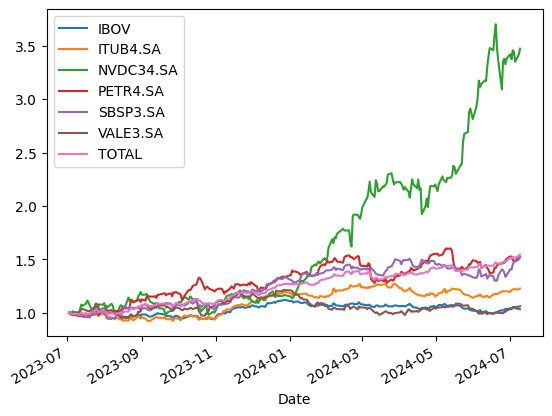

In [ ]:
df_final.plot()

In [ ]:
retorno_diario = pl.pct_change().dropna()
retorno_diario

Ticker,ITUB4.SA,NVDC34.SA,PETR4.SA,SBSP3.SA,VALE3.SA,TOTAL
Date,,,,,,
2023-07-04,-0.006215,-0.007494,0.002327,-0.015074,-0.004983,-0.005073
2023-07-05,0.008687,0.007079,-0.001327,0.008282,-0.008801,0.001201
2023-07-06,-0.014812,0.015464,-0.015277,-0.017143,-0.007195,-0.010974
2023-07-07,0.018881,-0.007845,-0.005059,0.017442,0.009406,0.006104
2023-07-10,-0.006520,-0.002326,0.001695,0.000000,-0.015276,-0.004099
...,...,...,...,...,...,...
2024-07-03,0.006124,0.024983,-0.017398,0.035967,0.019863,0.010002
2024-07-04,0.001522,-0.004062,-0.013742,0.013019,-0.004986,-0.003305
2024-07-05,0.000608,-0.027192,0.005359,0.004651,-0.004071,-0.003535


In [ ]:
pl

Ticker,ITUB4.SA,NVDC34.SA,PETR4.SA,SBSP3.SA,VALE3.SA,TOTAL
Date,,,,,,
2023-07-03,161.726051,98.189348,353.660698,221.625198,243.731277,1078.932573
2023-07-04,160.720860,97.453500,354.483707,218.284515,242.516830,1073.459413
2023-07-05,162.116993,98.143363,354.013390,220.092407,240.382401,1074.748553
2023-07-06,159.715679,99.661044,348.604988,216.319397,238.652756,1062.953864
2023-07-07,162.731289,98.879210,346.841396,220.092407,240.897598,1069.441901
...,...,...,...,...,...,...
2024-07-03,197.160004,339.710011,529.760002,322.600006,256.720001,1645.950024
2024-07-04,197.459999,338.330001,522.479996,326.799988,255.440002,1640.509986
2024-07-05,197.580002,329.130010,525.280006,328.320007,254.399994,1634.710019


<Axes: xlabel='Date'>

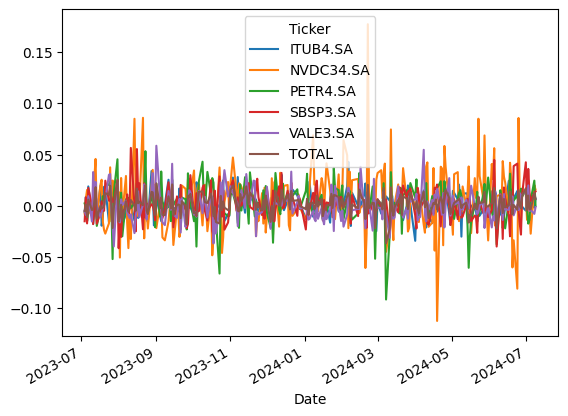

In [ ]:
retorno_diario.plot()

In [ ]:
valor_max_retorno = retorno_diario.max().max()
coluna_max_retorno = retorno_diario.max().idxmax()
data_max_retorno = retorno_diario[coluna_max_retorno].idxmax()

print(f"O ativo com o maior retorno diário é: {coluna_max_retorno}")
print(f"A data do maior retorno diário para {coluna_max_retorno} é: {data_max_retorno.strftime('%Y-%m-%d')}")
print(f"O valor máximo do retorno diário é: {valor_max_retorno*100:.2f}%")


O ativo com o maior retorno diário é: NVDC34.SA
A data do maior retorno diário para NVDC34.SA é: 2024-02-22
O valor máximo do retorno diário é: 17.70%


In [ ]:
retorno_acumulado = ((1 + retorno_diario['TOTAL']).cumprod()-1)*100
retorno_acumulado

Date
2023-07-04    -0.507275
2023-07-05    -0.387793
2023-07-06    -1.480974
2023-07-07    -0.879635
2023-07-10    -1.285891
                ...    
2024-07-03    52.553558
2024-07-04    52.049352
2024-07-05    51.511787
2024-07-08    53.486883
2024-07-09    54.492507
Name: TOTAL, Length: 254, dtype: float64

In [ ]:
#Retorno diário IBOV
retorno_ibov = ibov.pct_change()['IBOV']
retorno_ibov = retorno_ibov.fillna(0)
retorno_ibov

Date
2023-07-03    0.000000
2023-07-04   -0.004989
2023-07-05    0.003972
2023-07-06   -0.017758
2023-07-07    0.012536
                ...   
2024-07-03    0.007012
2024-07-04    0.003995
2024-07-05    0.000816
2024-07-08    0.002225
2024-07-09    0.004425
Name: IBOV, Length: 255, dtype: float64

In [ ]:
retorno_acumulado_ibov = ((1 + retorno_ibov).cumprod()-1) *100
retorno_acumulado_ibov

Date
2023-07-03    0.000000
2023-07-04   -0.498859
2023-07-05   -0.103616
2023-07-06   -1.877617
2023-07-07   -0.647598
                ...   
2024-07-03    5.004471
2024-07-04    5.423947
2024-07-05    5.510015
2024-07-08    5.744821
2024-07-09    6.212763
Name: IBOV, Length: 255, dtype: float64

In [ ]:
retorno_total = pd.DataFrame()
retorno_total['Retorno_Carteira'] = retorno_acumulado
retorno_total['IBOV'] = retorno_acumulado_ibov
retorno_total = retorno_total.dropna()
retorno_total_ibov = round(retorno_acumulado_ibov.iloc[-1],2)
retorno_total_ibov

6.21

<Axes: xlabel='Date'>

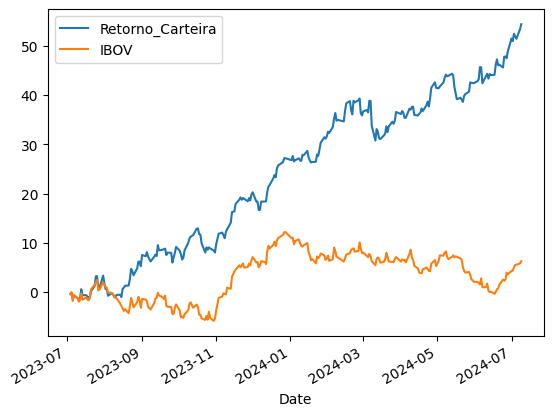

In [ ]:
retorno_total.plot()

In [ ]:
ultima_linha_retorno_carteira = retorno_total['Retorno_Carteira'].iloc[-1]
ultima_linha_ibov = retorno_total['IBOV'].iloc[-1]
porcentagem = (ultima_linha_retorno_carteira / ultima_linha_ibov) *100
print(f'Retorno da carteira: {porcentagem:.2f}% do IBOV')


Retorno da carteira: 877.11% do IBOV


In [ ]:
def calcular_retorno_acumulado(ticker):

    retorno_ticker = pl.pct_change()[ticker]#.dropna()
    #retorno_ticker = retorno_ticker.fillna(0)

    retorno_acumulado_ticker = ((1 + retorno_ticker).cumprod() - 1) * 100

    retorno_final = round(retorno_acumulado_ticker.iloc[-1], 2)

    print(f'Retorno acumulado de {ticker}: {retorno_final}%')

In [ ]:
for i in pl.columns:
  calcular_retorno_acumulado(i)

print(f'Retorno acumulado de IBOV: {retorno_total_ibov}%')

Retorno acumulado de ITUB4.SA: 22.8%
Retorno acumulado de NVDC34.SA: 247.38%
Retorno acumulado de PETR4.SA: 52.13%
Retorno acumulado de SBSP3.SA: 52.09%
Retorno acumulado de VALE3.SA: 3.43%
Retorno acumulado de TOTAL: 54.49%
Retorno acumulado de IBOV: 6.21%


In [ ]:
#Lista com o peso de cada ativo no início da carteira
w=[]
for i in pl.iloc[0]:
  a = i/pl['TOTAL'].iloc[0]
  w.append(a)

w.pop()
w = np.array(w)
w


array([0.14989449, 0.09100601, 0.32778758, 0.20541154, 0.22590038])

In [ ]:
def vol_ewma(serie, lbda = 0.94):

    # gera uma lista decrescente do número total de elementos menos um até 0
    i = np.arange(len(serie)-1, -1, -1)

    variancia = ((1 - lbda) * lbda ** i * serie ** 2).sum()

    vol = np.sqrt(variancia)
    #vol = vol * np.sqrt(252)
    return vol

In [ ]:
#Retira ultima coluna TOTAL
retorno_diario = retorno_diario.drop(columns=[retorno_diario.columns[-1]])

In [ ]:
#Calcula a VOL anualizada de cada ativo da carteira usando o EWMA
ewma_portfolio = retorno_diario.apply(vol_ewma)
for ativo, vol in ewma_portfolio.items():
    print(f"A volatilidade de {ativo} é: {vol* np.sqrt(252)*100:.2f}%")


A volatilidade de ITUB4.SA é: 13.59%
A volatilidade de NVDC34.SA é: 53.73%
A volatilidade de PETR4.SA é: 23.94%
A volatilidade de SBSP3.SA é: 33.14%
A volatilidade de VALE3.SA é: 15.52%


In [ ]:
#Calcula a VOL anualizada de cada ativo da carteira usando o desvio padrão simples
std_portfolio = retorno_diario.std()
std_portfolio = std_portfolio * np.sqrt(252)
for ativo, vol in std_portfolio.items():
    print(f"A volatilidade de {ativo} é: {vol*100:.2f}%")


A volatilidade de ITUB4.SA é: 18.64%
A volatilidade de NVDC34.SA é: 46.89%
A volatilidade de PETR4.SA é: 27.86%
A volatilidade de SBSP3.SA é: 24.32%
A volatilidade de VALE3.SA é: 22.75%


In [ ]:
#Função que calcula a vol da carteira toda, levando em conta a correlação entre os ativos
def vol_portfolio(series, pesos, ewma = False):
    pesos = w
    matriz_correl = np.corrcoef(series)
    vols = np.array([vol_ewma(x) if ewma else x.std() for x in series])
    variancia = np.matmul(np.matmul(vols * pesos, matriz_correl), vols * pesos)
    vol = np.sqrt(variancia)
    vol = vol * np.sqrt(252)
    return round(vol,4)

In [ ]:
print(f'Volatilidade Simples Carteira: {round((vol_portfolio(retorno_diario.T.values,w)*100),2)}%')


Volatilidade Simples Carteira: 14.06%


In [ ]:
print(f'Volatilidade EWMA Carteira: {vol_portfolio(retorno_diario.T.values,w,True)*100}%')

Volatilidade EWMA Carteira: 13.18%


In [ ]:
# media = media dos retornos
# nc = nível de confiança
# vol = Volatilidade
# dias = horizonte de tempo
# volume = volume financeiro do portfolio ou ativo

def calc_var_parametrico(media, nc, vol, volume, dias):
    var = (media - norm.ppf(nc) * vol * np.sqrt(dias)) * volume
    return var

In [ ]:
media = retorno_diario['NVDC34.SA'].mean()
nc = 0.95
vol = vol_ewma(retorno_diario['NVDC34.SA'])
dias = 1
volume = pl['TOTAL'].iloc[-1]

calc_var_parametrico(media, nc, vol, volume, dias)

-83.88973173595096

In [ ]:
vol = retorno_diario['NVDC34.SA'].std()
calc_var_parametrico(media, nc, vol, volume, dias)

-72.08483761791318

In [ ]:
def var_parametrico_portfolio(series, pesos, nc, dias, ewma = False):

    medias = [np.mean(serie) for serie in series]

    media_portfolio = (medias * pesos).sum()

    vol = vol_portfolio(series, pesos, ewma)

    var = calc_var_parametrico(media_portfolio, nc, vol, volume, dias)
    return var

In [ ]:
var_parametrico_portfolio(retorno_diario.T.values,w,0.95,1,True)
#Output: A carteira tem 5% (intervalo de confiança) de chance de perder o output no período (1d)

-358.6522403691191

In [ ]:
var_parametrico_portfolio(retorno_diario.T.values,w,0.96,1)
#Output: A carteira tem 4% (intervalo de confiança) de chance de perder o output no período (1d)

-407.5827979435045

#Próximos passos:

1) Quantas vezes a carteira violou o VaR

2) Gráfico de Volatilidade Simples x Vol EWMA por ativo

3) Comparação da carteira com o CDI acumulado no período
